The computational essay is where you will tell your story in detail. You have seen several examples of computational essays already, both on previous assignments and in class.

Your computational essay should be formatted as a Jupyter notebook and should interleave text and code. You should use code from your implementation by importing it into your notebook - long blocks of code in your notebook will make the flow of the essay hard to follow, and we would recommend avoiding it. If you find yourself defining long functions in your notebook, you should strongly consider moving those functions to your implementation instead.

Your essay should include the four sections listed below.
Introduction #

In the introduction, you should aim to tell the reader what your project is about. In doing so, you should answer the following questions:

    What is the question you are trying to answer or the story that you are trying you tell?
    Why is this question or story important?
    What were the main steps your project made towards answering the question or telling the story?

Beyond answering these questions, you are free to structure this section however you wish.
Methodology #

In the methodology, you should explain how you obtained, processed, and summarized or visualized the data. In doing so, you should answer the following questions:

    Where did you get your data from?
    How did you get this data (i.e., did you programmatically download it or did you access it through an API)?
    How did you store and/or process this data (e.g., did you store and process it in Pandas)?
    What information did you get from this data that you used in the presentation of your results?

Results #

In the results, you should show the main summaries or visualizations of your data, along with any accompanying information. In doing so, you should answer the following questions:

    What summaries or visualizations did you create?
    What are the interesting and/or important parts of these summaries or visualizations?
    How do these results answer your questions or tell your story?

Conclusion #

In the conclusion, you should provide key takeaways for the reader. In doing so, you should answer the following questions, where applicable:

    What are the important insights that the reader should get from this project?
    What are the ethical considerations surrounding the data sourcing?
    What are the contextual or ethical implications of your topic or work?
    What lessons did you learn as you did the project?
    What were the most difficult, challenging, or frustrating parts of the project?
    In what ways would you extend or change your project if you had more time?


# Pitchfork Bias Finder
Sally Lee, Eddy Pan, Vishnu Eskew

## Introduction

### What is Pitchfork?
[Pitchfork](https://pitchfork.com/) is an online music publication site originally founded in 1996. The site has many features, but the main attraction is the album reviews. The first album review by pitchfork was uploaded on January 5, 1999. Since then, more than 25,000 albums have been reviewed on the website. Every single one of these albums is given a rating on a scale of 0 to 10, and these ratings have sparked plenty of controversy in the past. A score of 0 indicates an album that innovates on how terrible music can be, and a score of 10 indicates an instant classic.

Many people love to hate on pitchfork and their methodology for rating albums. An example comes in the review of [Peppa's Adventures: The Album - Peppa Pig](https://pitchfork.com/reviews/albums/peppa-pig-peppas-adventures-the-album/) with a rating of 6.5. Classic albums such as [Discovery - Daft Punk](https://pitchfork.com/reviews/albums/2134-discovery/), [The New Abnormal - The Strokes](https://pitchfork.com/reviews/albums/the-strokes-the-new-abnormal/), and [Rodeo - Travis Scott](https://pitchfork.com/reviews/albums/21016-rodeo/) have all been beaten out by the second LP from the UK singer-songwriter and four year old pig, Peppa.

### Why do we care about Pitchfork?
As self proclaimed music connoiseurs ourselves, we think that our oppinions on music are the objective truth. Despite this, Pitchfork again and again has given some of our favorite albums low scores, in part invalidating the emotional connection we feel with the music we love. In our project, we aim to find out if Pitchfork album reviews are biased, and if so, what formula should an album follow to recieve a high rating on Pitchfork? For example, do albums with higher average BPMs tend to receive higher ratings?

## Methodology

### Where did we get data from?




rap


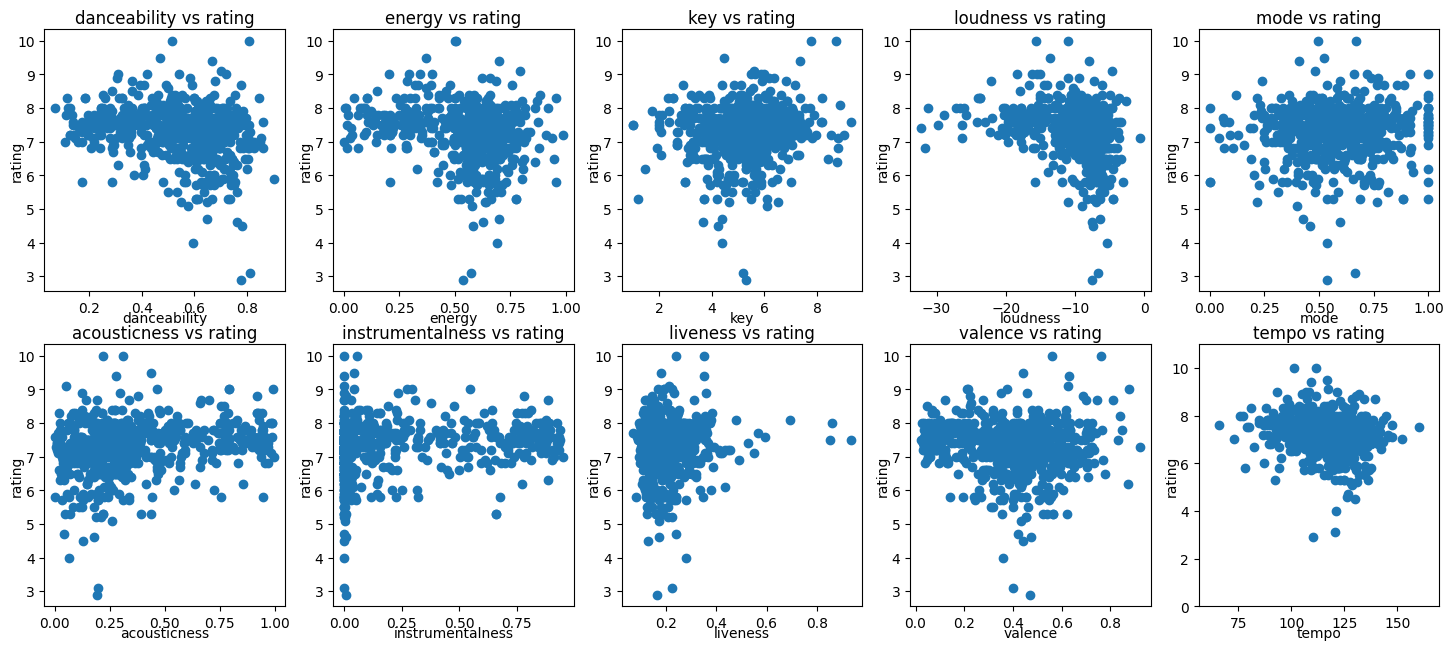

jazz


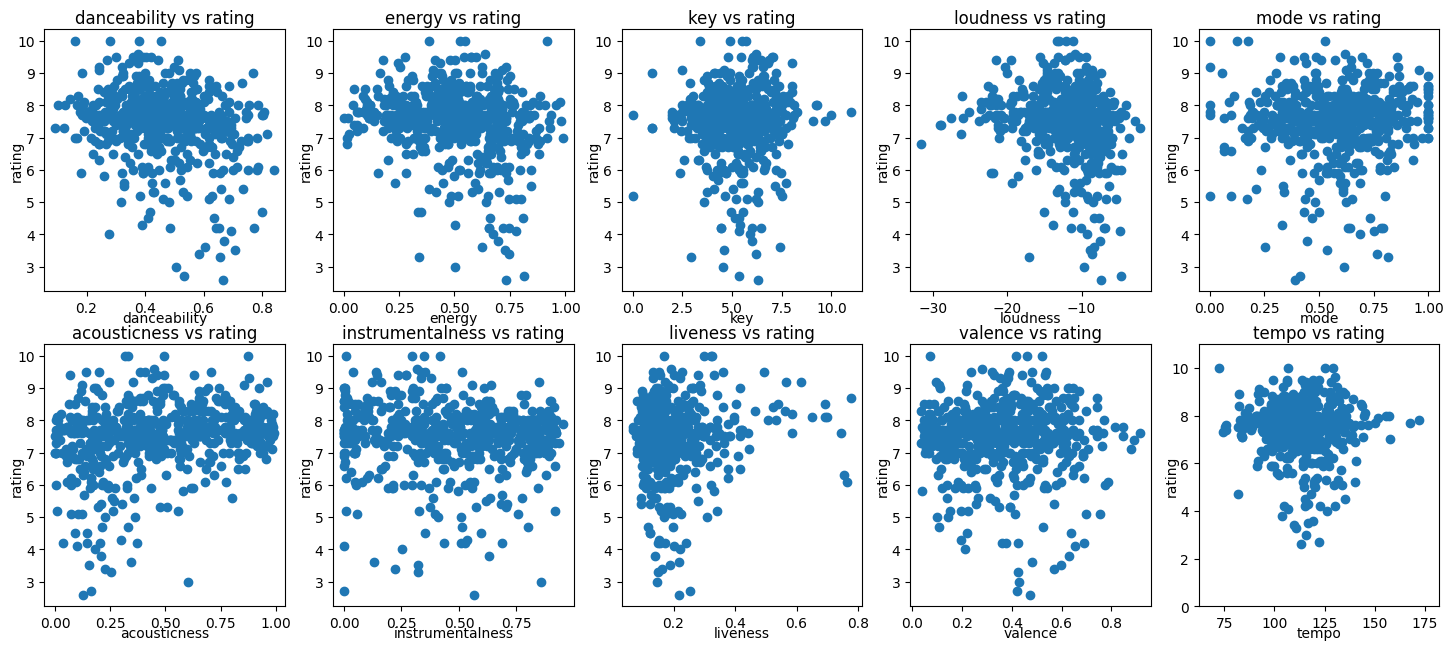

electronic


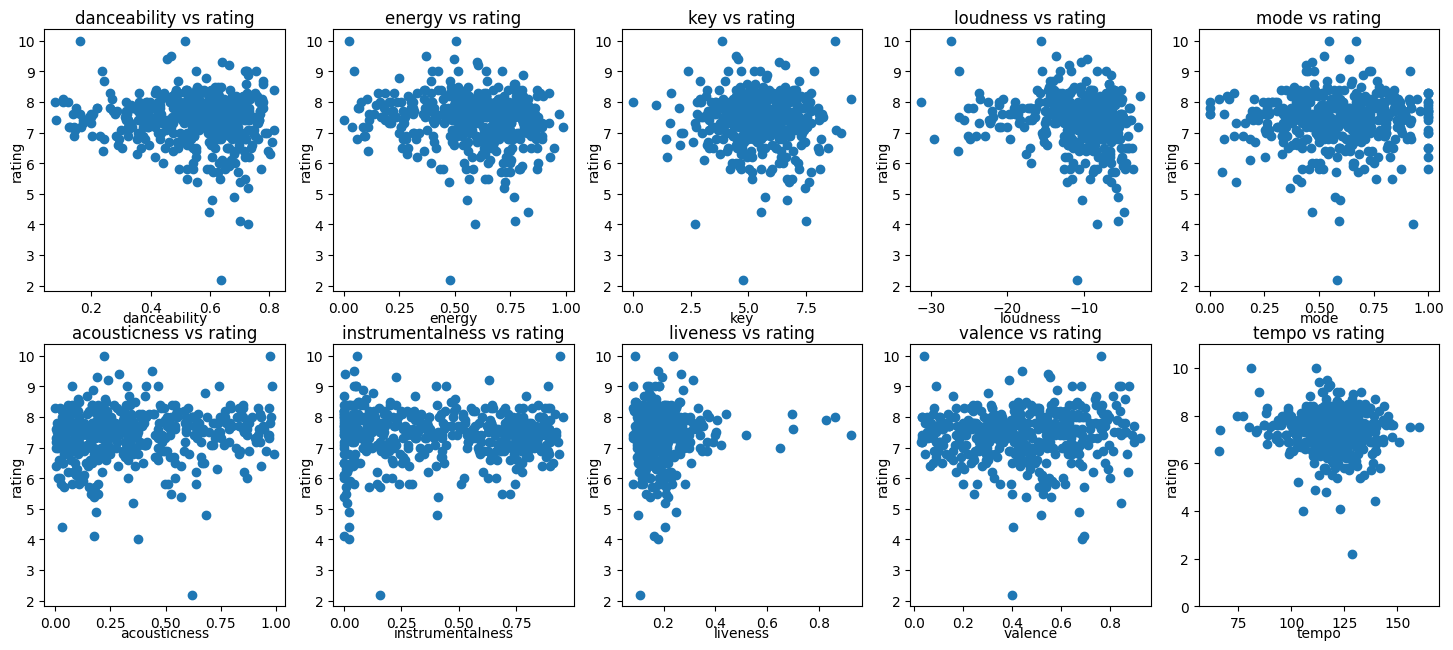

rock


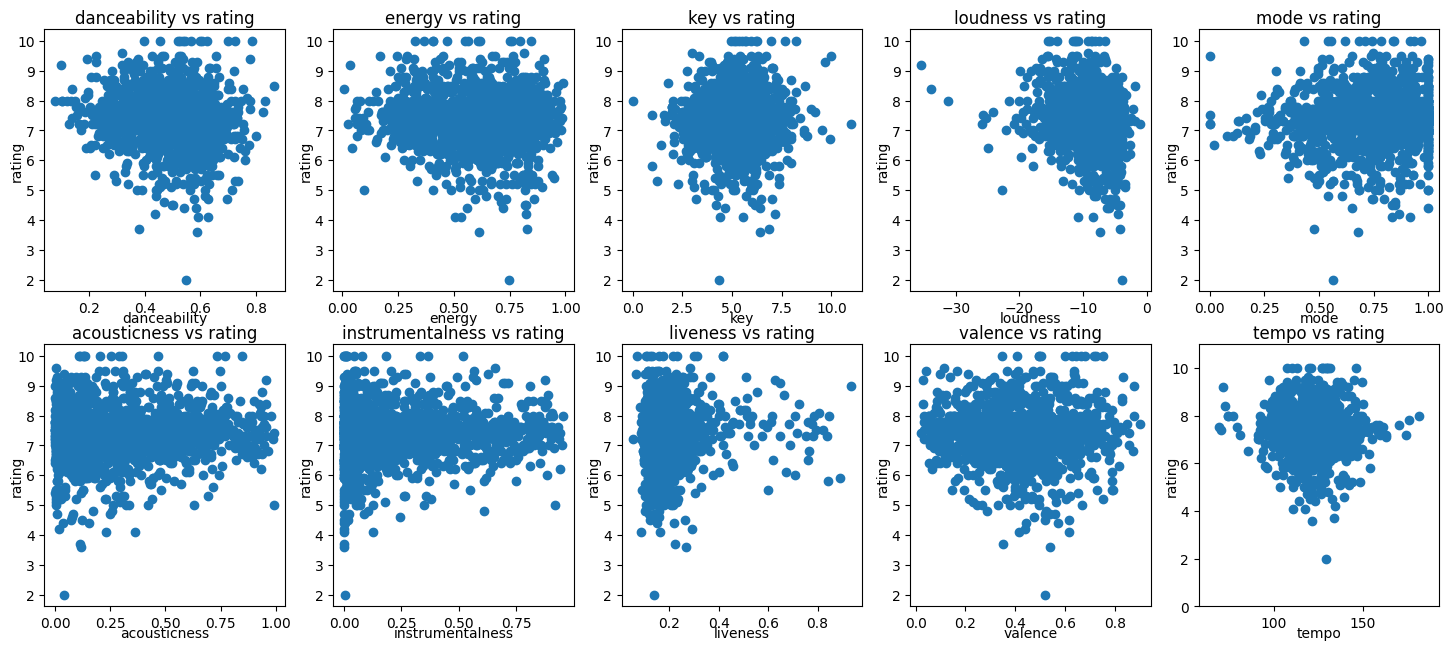

pop


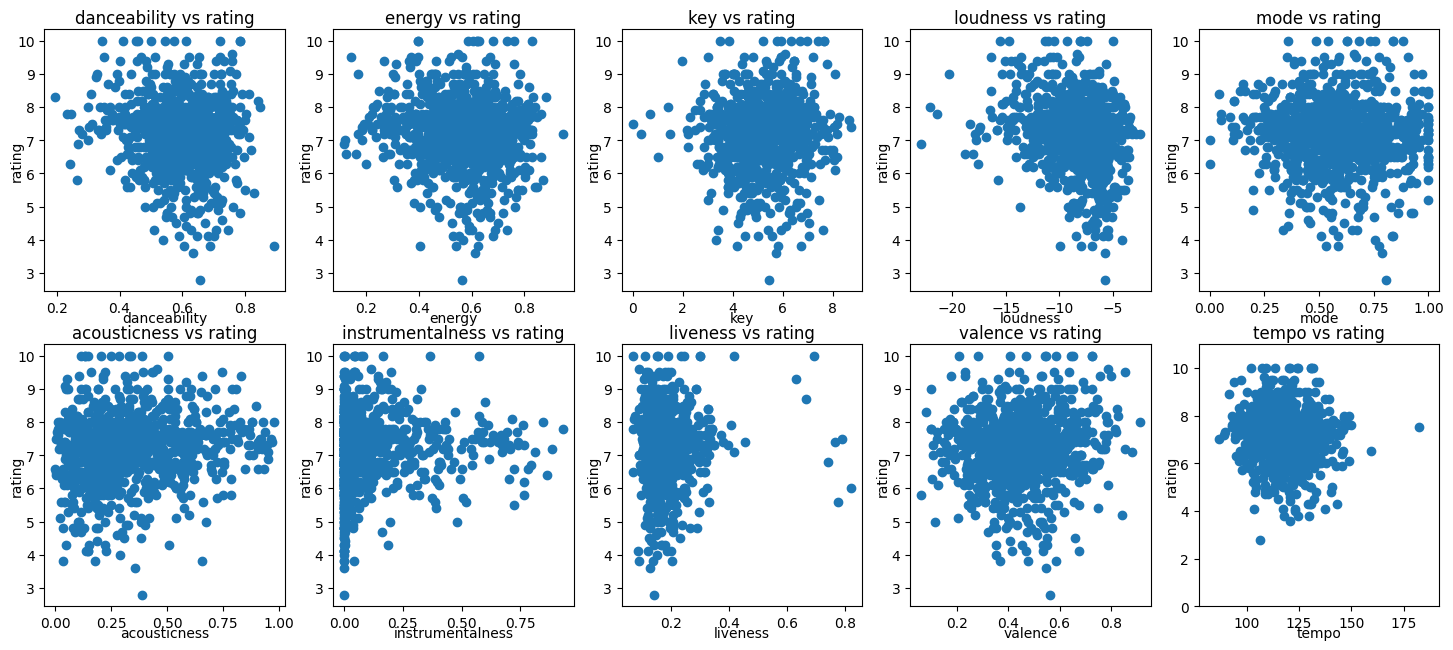

metal


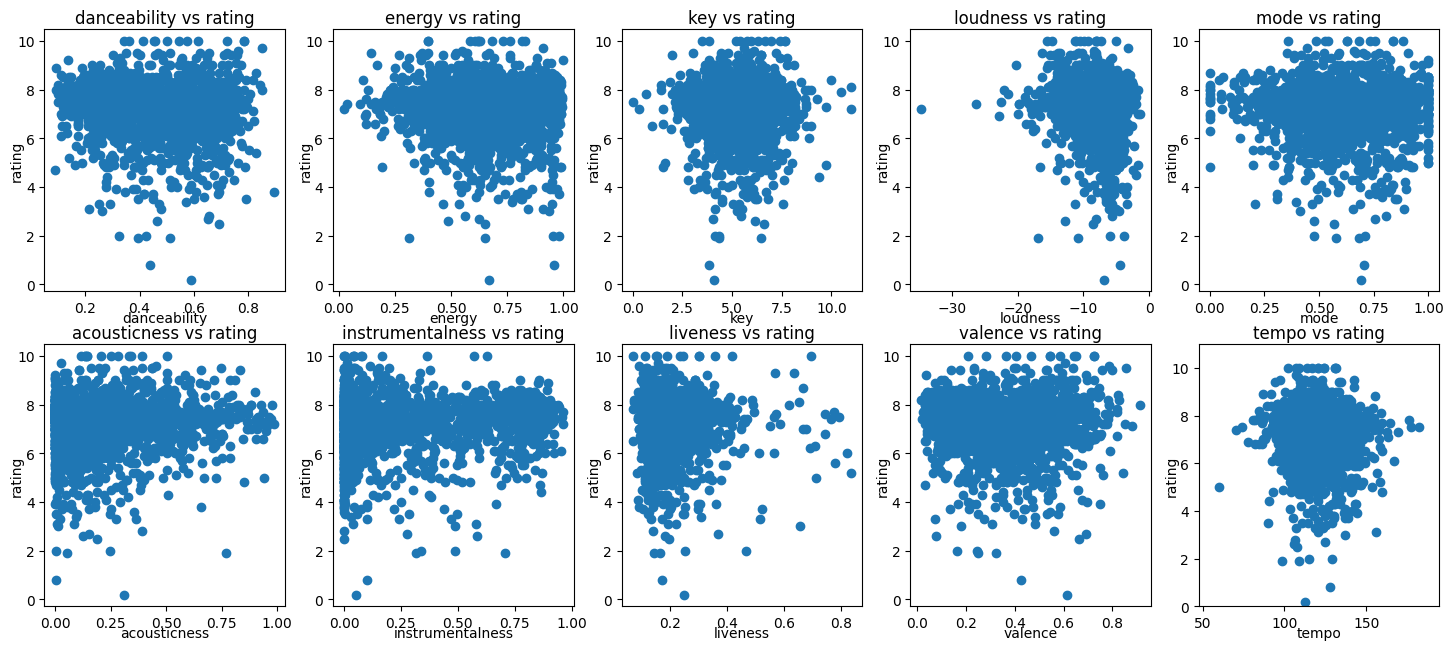

global


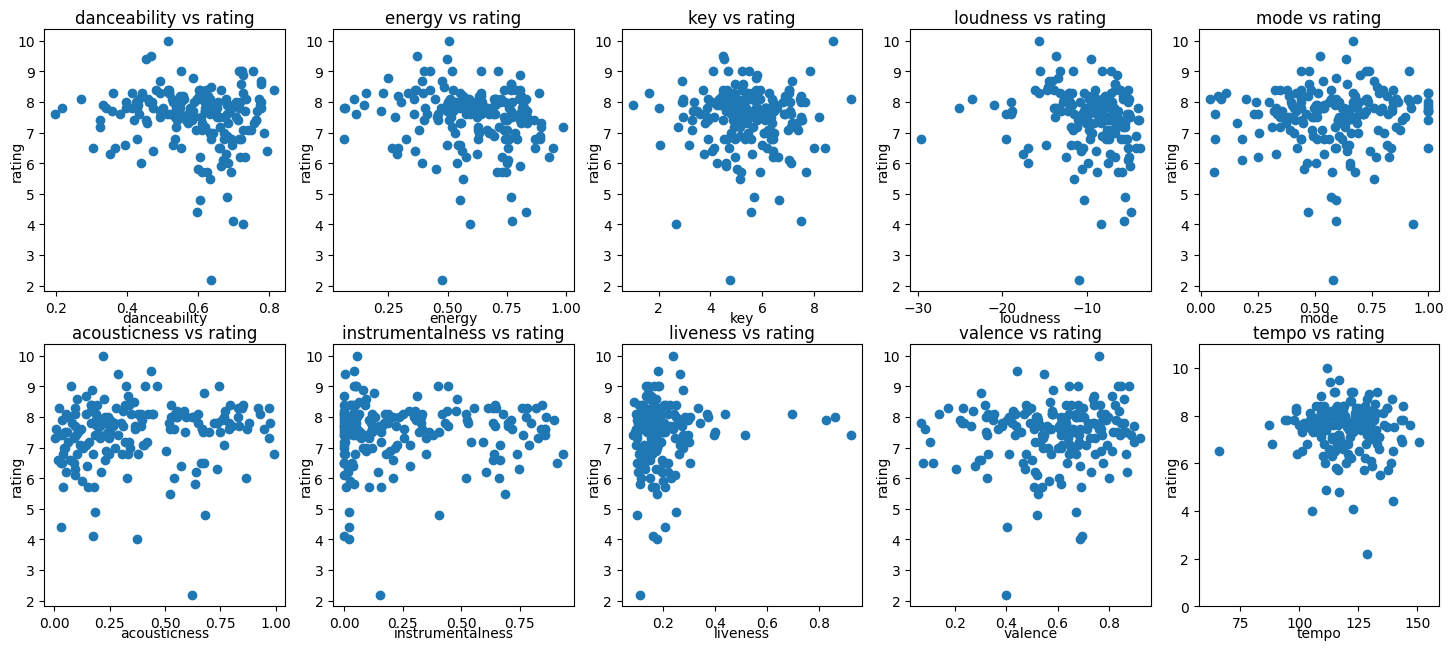

experimental


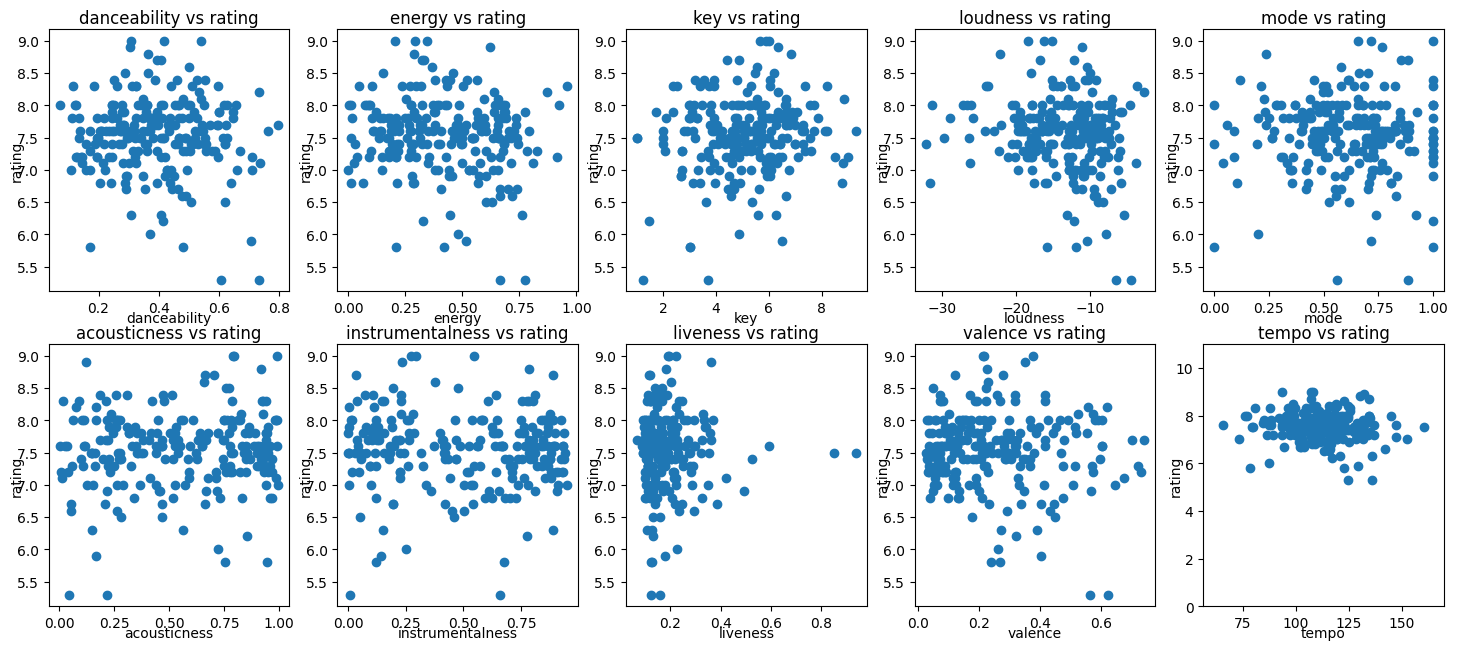

folk


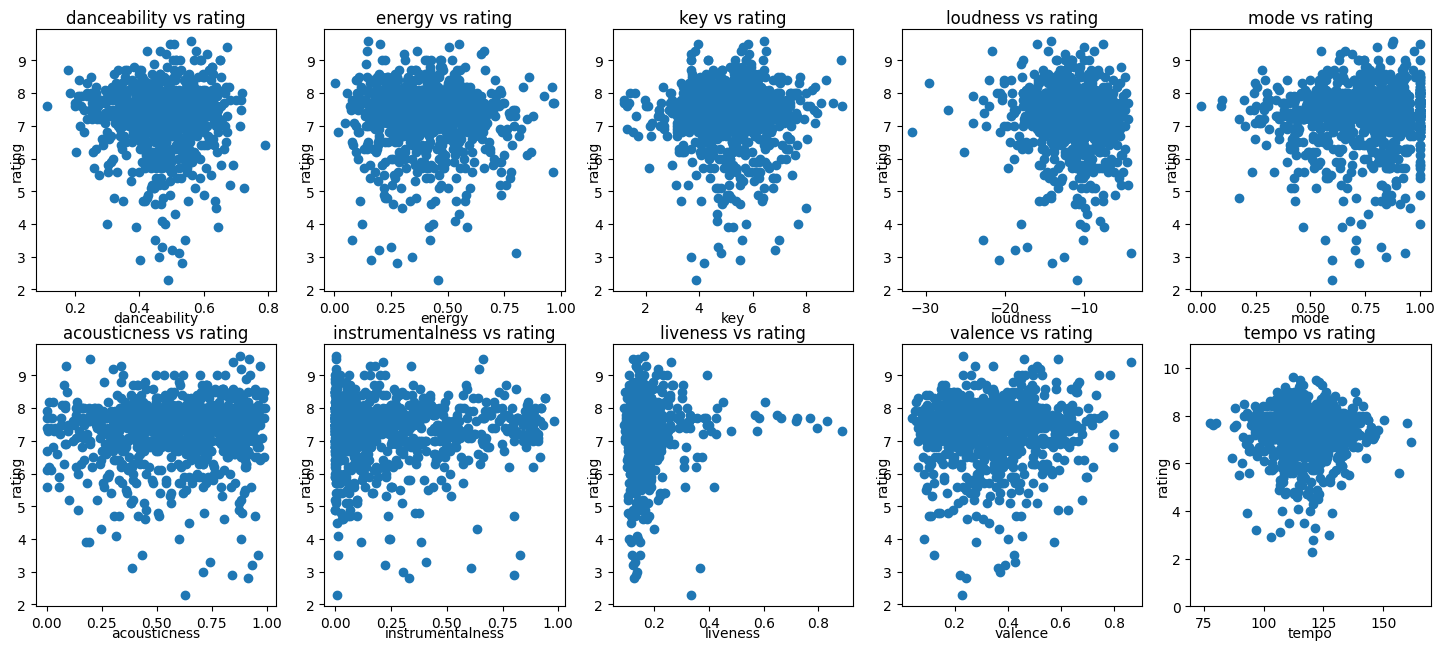

In [80]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

folder_path = 'data_final/'
features = ["danceability", "energy", "key", "loudness", "mode", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

# The following loop would ideally go genre by genre and make the subplot for each one.
for file_path in glob.glob(folder_path + "*.csv"):
    # data_final/electronic_final.csv
    # 0123456789012345678901234567890
    #-1098765432109876543210987654321
    genre = file_path[11:-10]
    print(genre)
    df = pd.read_csv(file_path)

    fig, axs = plt.subplots(2, 5, figsize = (18,7.5))
    row = 0
    column = 0
    for _, feature in enumerate(features):
        # plt.figure(figsize=(5,4))
        axs[row][column].scatter(df[feature], df["rating"])
        xmin = min(df[feature])
        xmax = max(df[feature])
        margins = (xmax - xmin) / 10
        plt.xlim((xmin - margins), (xmax + margins))
        plt.ylim(0,11)
        axs[row][column].set_title(f"{feature} vs rating", y = .99)
        axs[row][column].set_xlabel(f"{feature}", labelpad = -3)
        axs[row][column].set_ylabel("rating", labelpad = -5)
        column += 1
        if column > 4:
            column = 0
            row += 1
    plt.show()
